# 훈련 세트와 테스트 세트

## 훈련 세트(35개)와 테스트 세트(14개)

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
# 사이킷런 사용을 위해 2차원 배열 만들기
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [3]:
print(fish_data[4])

[29.0, 430.0]


In [4]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [5]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [6]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [7]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
x_train = fish_data[:35]

# 훈련 세트로 타겟값 중 0부터 34번째 인덱스까지 사용
y_train = fish_target[:35]

# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
x_test = fish_data[35:]

# 테스트 세트로 타겟값 중 35번째부터 마지막 인덱스까지 사용
y_test = fish_target[35:]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [9]:
# model = model.fit(train_input, train_target)
model.fit(x_train, y_train)  # 위에 코드와 동일, 변수에 담냐 차이
model.score(x_test, y_test)  # 정확도 0.0  # why? 샘플링 편향

0.0

## 넘파이

In [10]:
import numpy as np

In [11]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [12]:
print(input_arr[:2])

[[ 25.4 242. ]
 [ 26.3 290. ]]


In [13]:
# np array.shape: (샘플 수, 특성 수)를 출력
print(input_arr.shape)

(49, 2)


In [14]:
np.random.seed(42)  # 이 코드를 써준 사람들끼린 랜덤한 행위가 동일(= 머신러닝 알고리즘들의 random_state 속성)

# 0 ~ 48 정수 배열 만들어서 idx 만들기
index = np.arange(49)  # 파이썬의 range와 쓰는 법 동일

# 무작위로 섞기
np.random.shuffle(index)

In [15]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [16]:
print(input_arr[[1, 3]])  # idx 1과 3 선택

[[ 26.3 290. ]
 [ 29.  363. ]]


In [17]:
# 훈련 세트와 테스트 세트 나누기
x_train = input_arr[index[:35]]
y_train = target_arr[index[:35]]

x_test = input_arr[index[35:]]
y_test = target_arr[index[35:]]

In [19]:
# 확인
print(input_arr[13], x_train[0])

[ 32. 340.] [ 32. 340.]


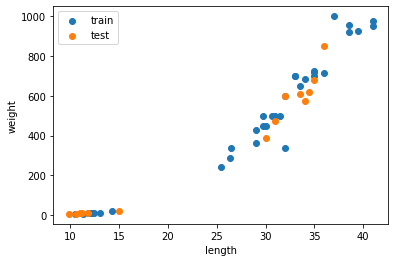

In [21]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.scatter(x_test[:, 0], x_test[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(['train', 'test'])
plt.show()

## 두 번째 머신러닝 프로그램

In [22]:
# 학습하기

# model = model.fit(train_input, train_target)
model.fit(x_train, y_train)  # 위에 코드와 동일, 변수에 담냐 차이

KNeighborsClassifier()

In [23]:
# 평가하기
model.score(x_test, y_test)

1.0

In [25]:
# 예측하기
model.predict(x_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [26]:
# 확인
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])